In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_confusion_matrix

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
hol = pd.read_csv('Holiday_Package.csv')

In [3]:
hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
hol = hol.drop('Unnamed: 0',axis=1)

In [5]:
hol.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [7]:
hol.shape

(872, 7)

In [8]:
hol.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [9]:
hol.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [10]:
hol.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [11]:
dup = hol.duplicated()
hol[dup]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [12]:
hol['no_young_children']=hol['no_young_children'].astype('object')
hol['no_older_children']=hol['no_older_children'].astype('object')

In [13]:
hol.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children    object
no_older_children    object
foreign              object
dtype: object

In [14]:
for column in hol.columns:
    if hol[column].dtype == 'object':
        print(column.upper(),': ',hol[column].nunique())
        print(hol[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  7
6      2
5      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [15]:
hol1 = hol.drop(['Holliday_Package','foreign','no_young_children','no_older_children'],axis=1)
hol1.columns

Index(['Salary', 'age', 'educ'], dtype='object')

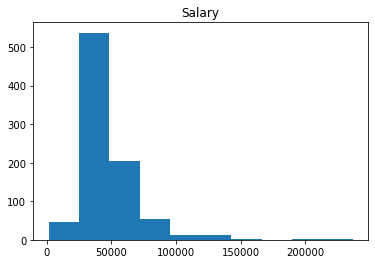

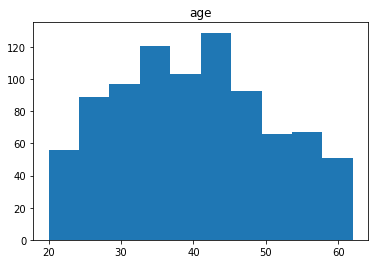

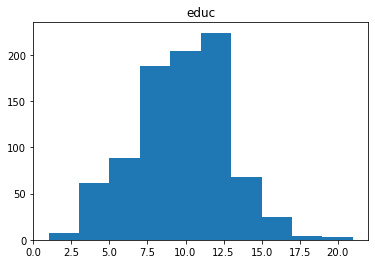

In [16]:
for i in hol1.columns:
    plt.figure()
    plt.hist(hol1[i].astype('float'))
    plt.title(i)
    plt.show()

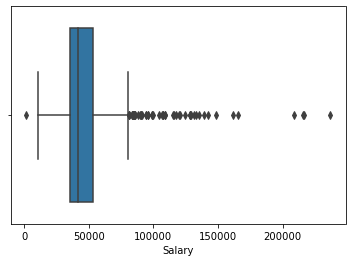

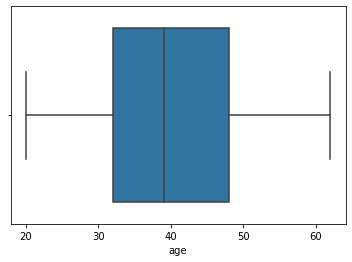

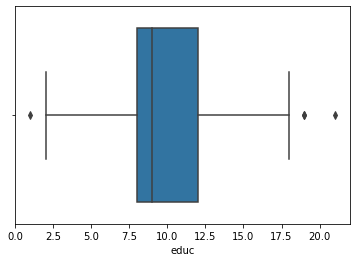

In [17]:
for col in hol1:
    plt.figure()
    sns.boxplot(hol1[col])

<AxesSubplot:xlabel='foreign', ylabel='educ'>

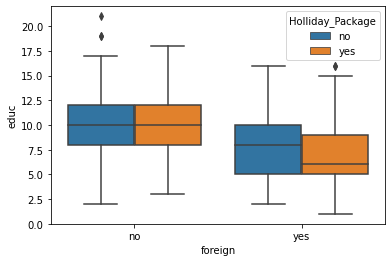

In [18]:
sns.boxplot(x=hol['foreign'],y=hol['educ'],hue=hol['Holliday_Package'])

In [19]:
pd.crosstab(hol['Holliday_Package'],hol['foreign'])

foreign,no,yes
Holliday_Package,,
no,402,69
yes,254,147


In [20]:
pd.crosstab(hol['Holliday_Package'],hol['no_young_children'])

no_young_children,0,1,2,3
Holliday_Package,,,,
no,326,100,42,3
yes,339,47,13,2


In [21]:
pd.crosstab(hol['Holliday_Package'],hol['no_older_children'])

no_older_children,0,1,2,3,4,5,6
Holliday_Package,,,,,,,
no,231,102,102,27,7,2,0
yes,162,96,106,28,7,0,2


<AxesSubplot:xlabel='foreign', ylabel='count'>

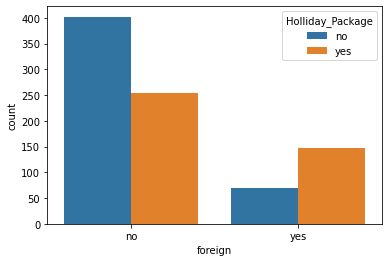

In [22]:
sns.countplot(hol['foreign'],hue=hol['Holliday_Package'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

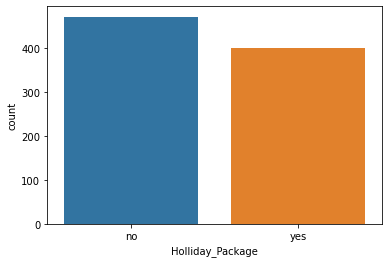

In [23]:
sns.countplot(hol['Holliday_Package'])

<AxesSubplot:xlabel='foreign', ylabel='count'>

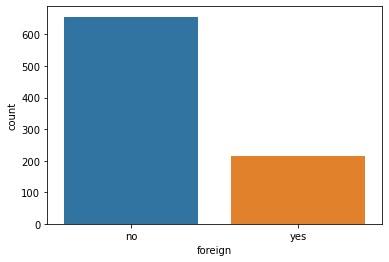

In [24]:
sns.countplot(hol['foreign'])

<AxesSubplot:xlabel='no_young_children', ylabel='count'>

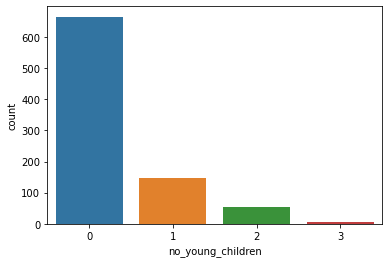

In [25]:
sns.countplot(hol['no_young_children'])

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

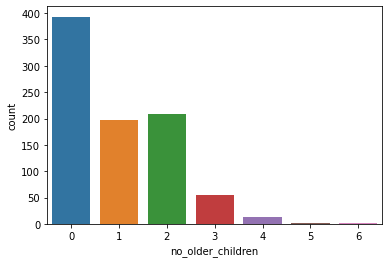

In [26]:
sns.countplot(hol['no_older_children'])

<AxesSubplot:xlabel='no_young_children', ylabel='count'>

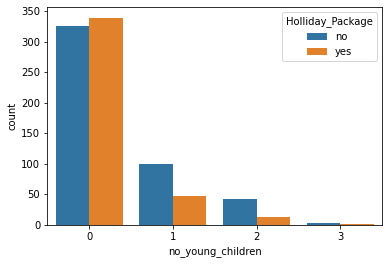

In [27]:
sns.countplot(hol['no_young_children'],hue=hol['Holliday_Package'])

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

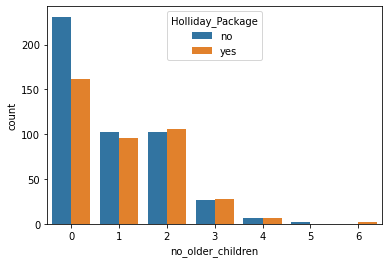

In [28]:
sns.countplot(hol['no_older_children'],hue=hol['Holliday_Package'])

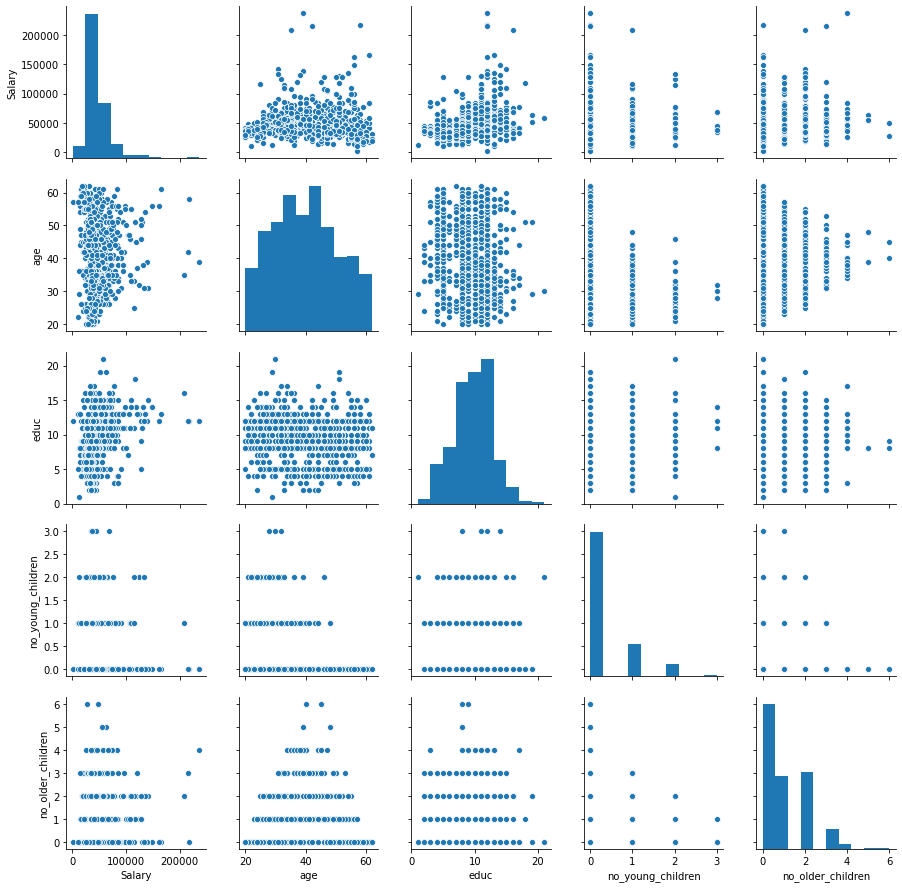

In [29]:
sns.pairplot(hol)

In [30]:
corr = hol.corr()
corr

,Salary,age,educ
Salary,1.000000,0.071709,0.326540
age,0.071709,1.000000,-0.149294
educ,0.326540,-0.149294,1.000000


<AxesSubplot:>

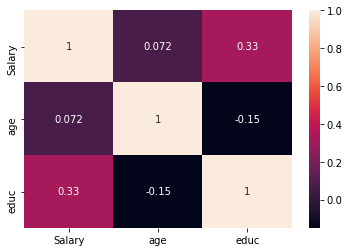

In [31]:
sns.heatmap(corr,annot=True)

In [32]:
print('For the numeric columns which has value 0 to be checked:\n')
for i in hol1.columns:
    x=hol1[hol1[i]==0]
    print('\nIn the column ',i,':\n')
    print(x)

For the numeric columns which has value 0 to be checked:


In the column  Salary :

Empty DataFrame
Columns: [Salary, age, educ]
Index: []

In the column  age :

Empty DataFrame
Columns: [Salary, age, educ]
Index: []

In the column  educ :

Empty DataFrame
Columns: [Salary, age, educ]
Index: []


In [33]:
for feat in hol.columns:
    if hol[feat].dtypes == 'object':
        hol[feat] = pd.Categorical(hol[feat]).codes

In [34]:
hol['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [35]:
hol['foreign'].value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [36]:
hol['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [37]:
hol['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [38]:
hol['educ'].value_counts()

8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64

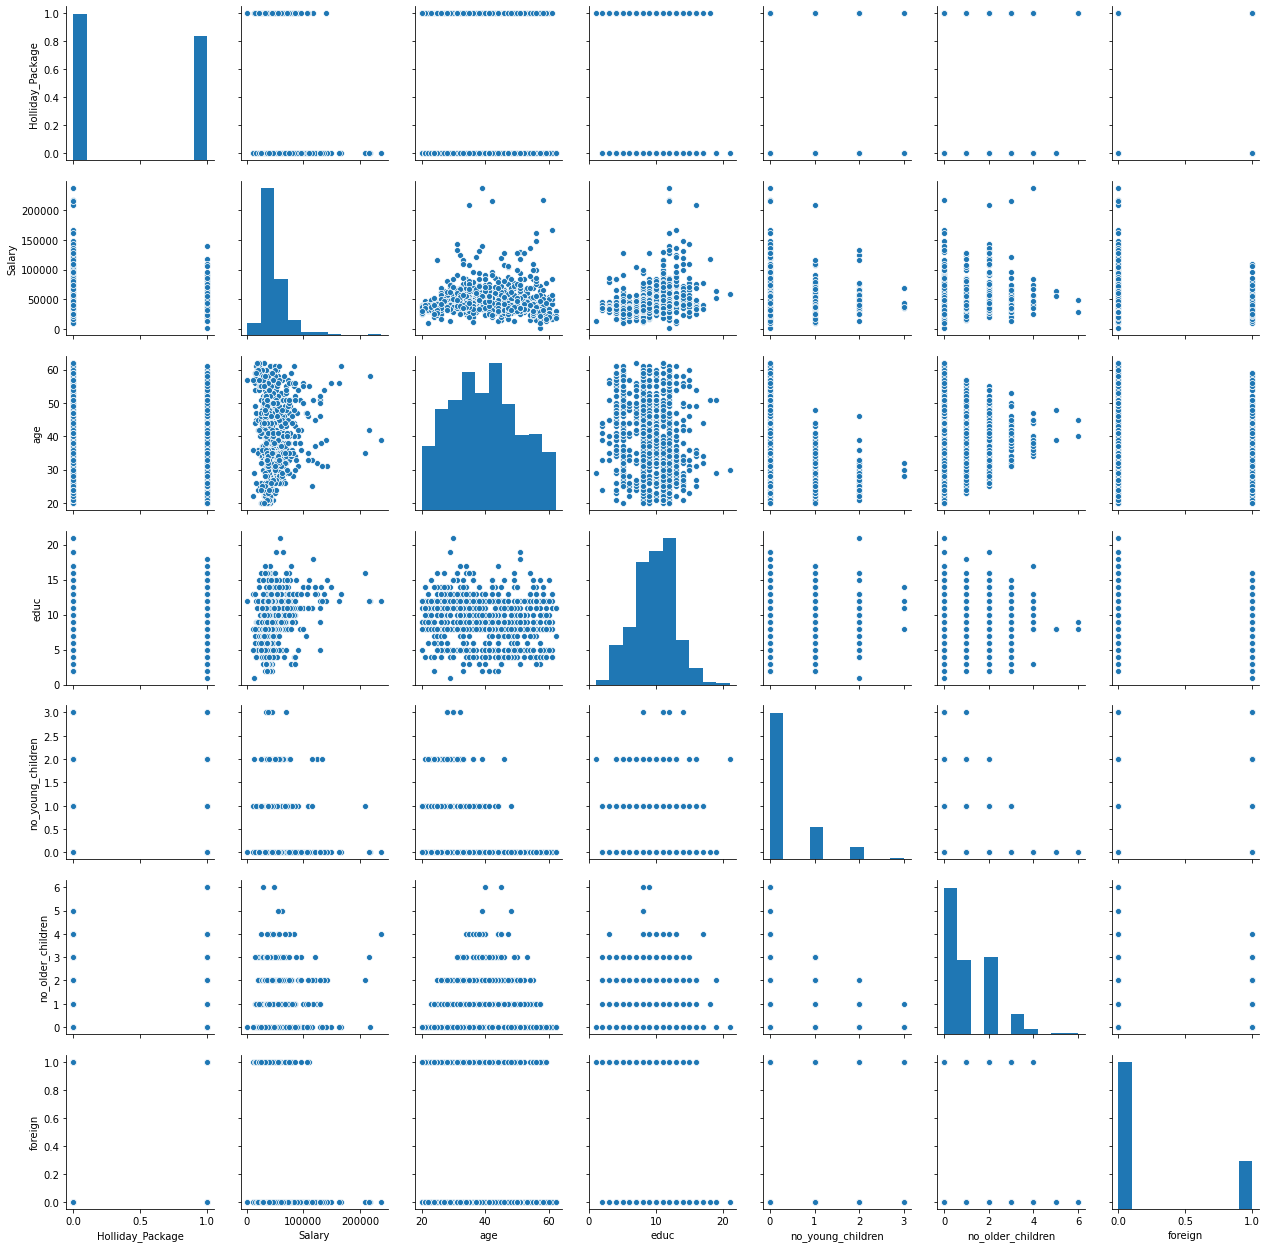

In [39]:
sns.pairplot(hol)

In [40]:
corr = hol.corr()
corr

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,1.000000,-0.185694,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.185694,1.000000,0.071709,0.326540,-0.029664,0.113772,-0.201043
age,-0.092311,0.071709,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.326540,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.029664,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.113772,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign,0.254096,-0.201043,-0.107148,-0.419678,0.085111,0.021317,1.000000


<AxesSubplot:>

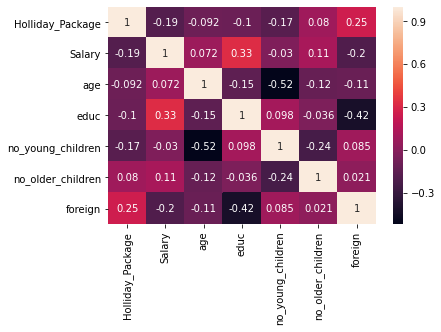

In [41]:
sns.heatmap(corr,annot=True)

In [42]:
Q1 = hol.quantile(0.25)
Q3 = hol.quantile(0.75)
IQR = Q3-Q1

In [43]:
hol_out = hol[~((hol < (Q1 - 1.5 * IQR)) |(hol > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Shape of the data without outlier treatment :",hol_out.shape)
print("Shape of the original data  :",hol.shape)

Shape of the data without outlier treatment : (466, 7)
Shape of the original data  : (872, 7)


<AxesSubplot:>

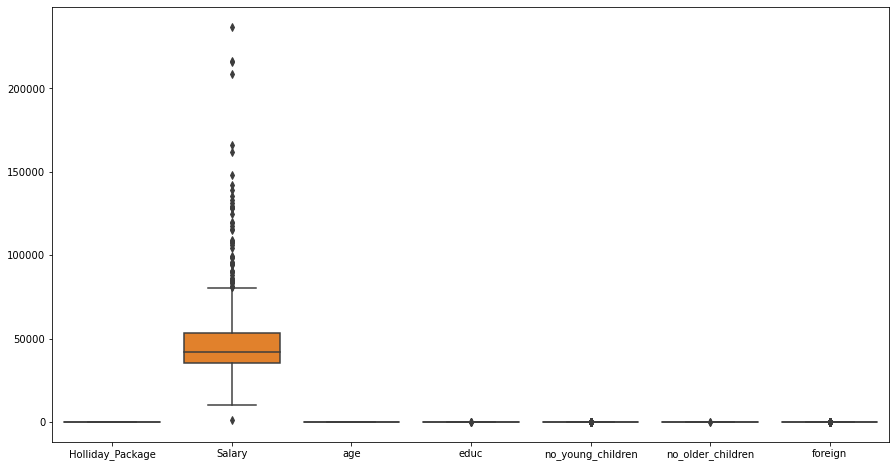

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(data=hol)

In [45]:
Q1s =hol['Salary'].quantile(0.25)
Q3s =hol['Salary'].quantile(0.75)
IQRs=Q3s-Q1s
Q1a =hol['age'].quantile(0.25)
Q3a =hol['age'].quantile(0.75)
IQRa=Q3a-Q1a

In [46]:
hol.groupby(((hol['Salary'] < (Q1s - 1.5 * IQRs)) |(hol['Salary'] > (Q3s + 1.5 * IQRs)))).size()

Salary
False    815
True      57
dtype: int64

In [47]:
hol.groupby(((hol['age'] < (Q1a - 1.5 * IQRa)) |(hol['age'] > (Q3a + 1.5 * IQRa)))).size()

age
False    872
dtype: int64

In [48]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)

    return lower_range, upper_range

In [49]:
for column in hol.drop(['Holliday_Package','foreign','no_young_children','no_older_children','educ'],axis=1):
    lr,ur=treat_outlier(hol[column])
    hol[column]=np.where(hol[column]>ur,ur,hol[column])
    hol[column]=np.where(hol[column]<lr,lr,hol[column])

In [50]:
hol_out = hol[~((hol < (Q1 - 1.5 * IQR)) |(hol > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Shape of the data with outlier treatment :",hol_out.shape)
print("Shape of the original data  :",hol.shape)

Shape of the data with outlier treatment : (509, 7)
Shape of the original data  : (872, 7)


In [51]:
hol.dtypes

Holliday_Package        int8
Salary               float64
age                  float64
educ                   int64
no_young_children       int8
no_older_children       int8
foreign                 int8
dtype: object

In [52]:
hol['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [53]:
hol['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [54]:
hol.describe()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.459862,45608.336869,39.955275,9.307339,0.311927,0.982798,0.247706
std,0.498672,15699.745151,10.551675,3.036259,0.612870,1.086786,0.431928
min,0.000000,8105.750000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,35324.000000,32.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,41903.500000,39.000000,9.000000,0.000000,1.000000,0.000000
75%,1.000000,53469.500000,48.000000,12.000000,0.000000,2.000000,0.000000
max,1.000000,80687.750000,62.000000,21.000000,3.000000,6.000000,1.000000


<AxesSubplot:>

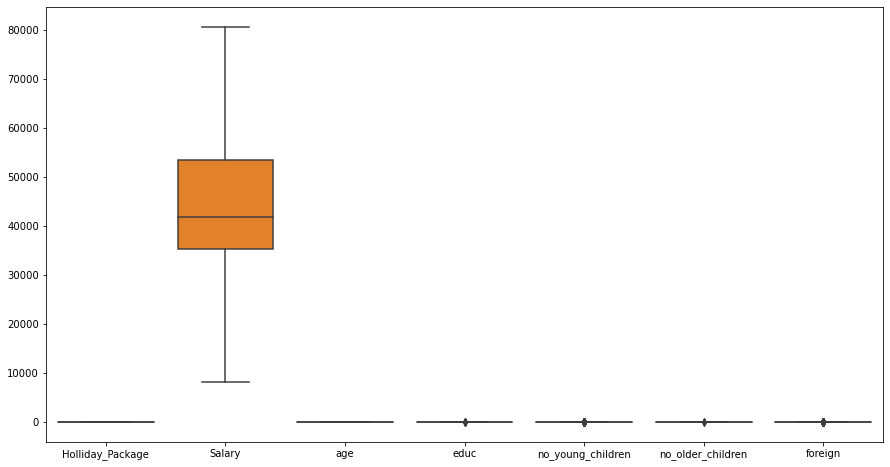

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(data=hol)

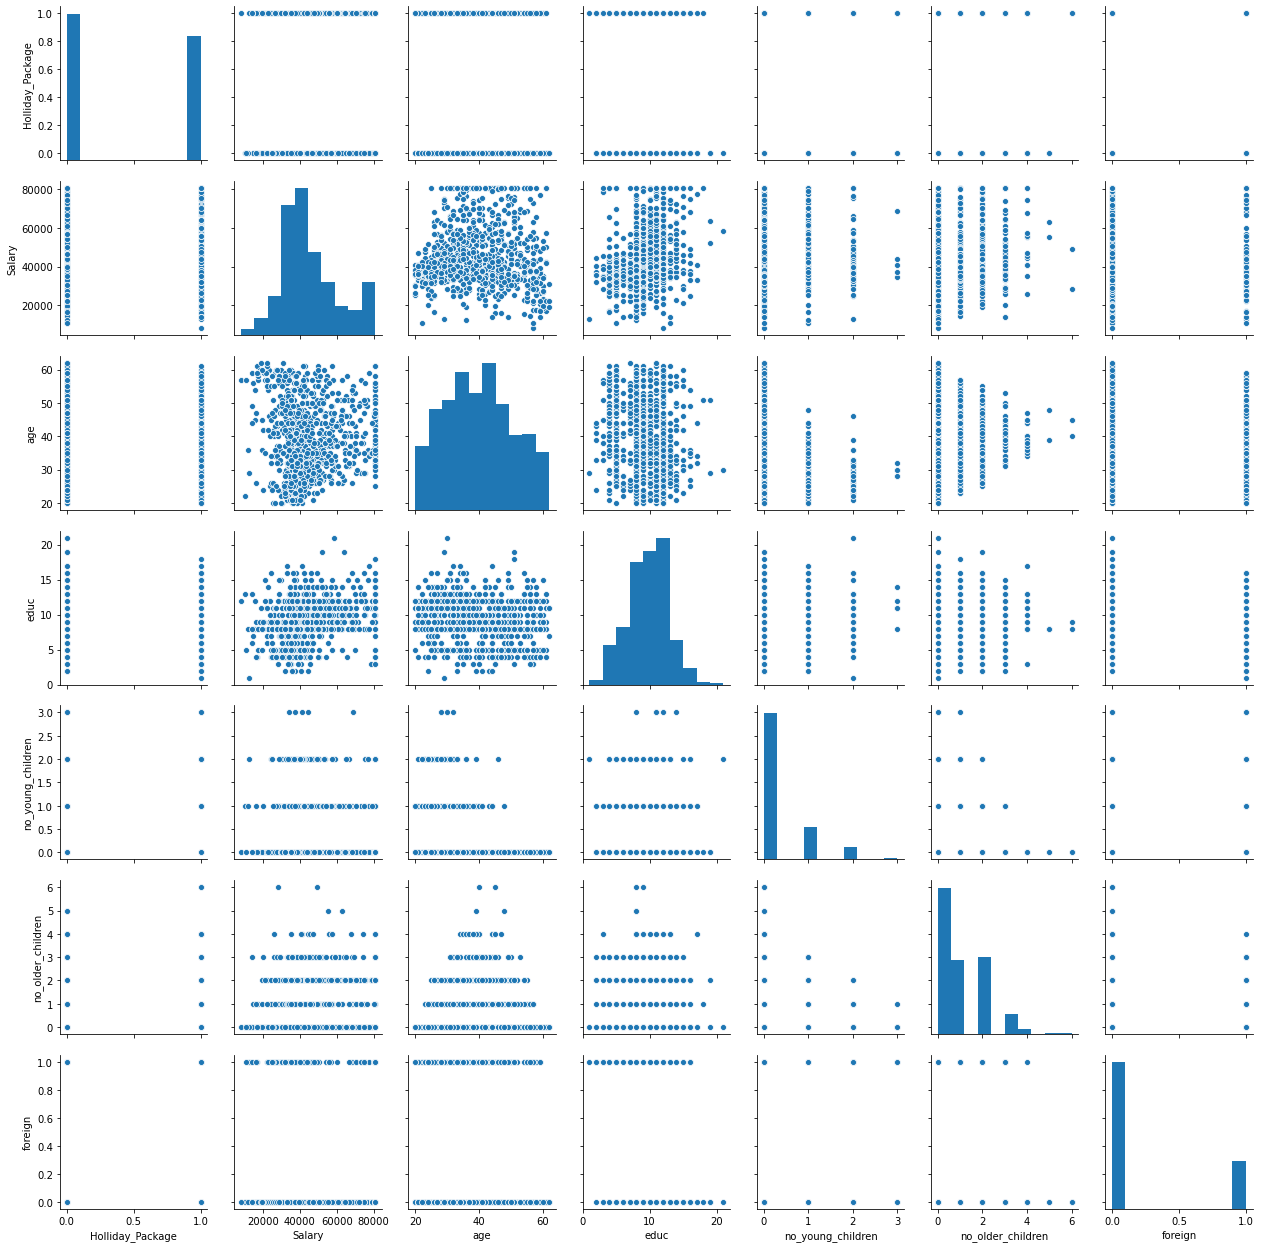

In [56]:
sns.pairplot(hol)

In [57]:
corr = hol.corr()
corr

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,1.000000,-0.180214,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.180214,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387
age,-0.092311,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign,0.254096,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000


<AxesSubplot:>

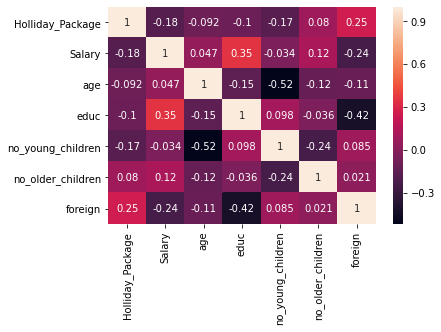

In [58]:
sns.heatmap(corr,annot=True)

In [59]:
# Copy all the predictor variables into X dataframe
X = hol.drop('Holliday_Package',axis=1)


# Copy target into the y dataframe. 
y = hol['Holliday_Package']


In [60]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
#stratify : array-like, default=None If not None, data is split in a stratified fashion, using this as the class labels.


## Logistic Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
LogRegmodel = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LogRegmodel.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [62]:
y_test_p = LogRegmodel.predict(X_test)
y_train_p = LogRegmodel.predict(X_train)

In [63]:
y_test_proba = LogRegmodel.predict_proba(X_test)
y_train_proba = LogRegmodel.predict_proba(X_train)
print('Probability of belonging to Class 1 for Train data:')
print(y_train_proba)
print('Probability of belonging to Class 1 for Test data:')
print(y_test_proba)

Probability of belonging to Class 1 for Train data:
[[0.27172231 0.72827769]
 [0.74210337 0.25789663]
 [0.61023014 0.38976986]
 ...
 [0.45867687 0.54132313]
 [0.25982794 0.74017206]
 [0.50860682 0.49139318]]
Probability of belonging to Class 1 for Test data:
[[0.67784495 0.32215505]
 [0.53449288 0.46550712]
 [0.69184494 0.30815506]
 [0.48774461 0.51225539]
 [0.57193909 0.42806091]
 [0.3282923  0.6717077 ]
 [0.5644179  0.4355821 ]
 [0.30241555 0.69758445]
 [0.37930908 0.62069092]
 [0.59935893 0.40064107]
 [0.569683   0.430317  ]
 [0.18159199 0.81840801]
 [0.45631038 0.54368962]
 [0.53157607 0.46842393]
 [0.39407452 0.60592548]
 [0.31983541 0.68016459]
 [0.44193877 0.55806123]
 [0.80219496 0.19780504]
 [0.58093523 0.41906477]
 [0.64309454 0.35690546]
 [0.28387233 0.71612767]
 [0.61947751 0.38052249]
 [0.83826152 0.16173848]
 [0.59697278 0.40302722]
 [0.23223995 0.76776005]
 [0.32557752 0.67442248]
 [0.57047624 0.42952376]
 [0.74681104 0.25318896]
 [0.56832546 0.43167454]
 [0.31706743 0.6

In [64]:
acc_log_train = LogRegmodel.score(X_train,y_train)
print('Accuracy of the Logistic Regression for Train data:',acc_log_train)

Accuracy of the Logistic Regression for Train data: 0.6672131147540984


AUC of the Logistic Regression for Train data: 0.733


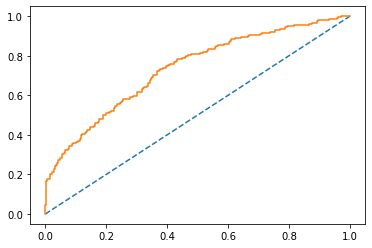

In [65]:
# predict probabilities
probs = LogRegmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC of the Logistic Regression for Train data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [66]:
acc_log_test = LogRegmodel.score(X_test,y_test)
print('Accuracy of the Logistic Regression of the Test data:',acc_log_test)

Accuracy of the Logistic Regression of the Test data: 0.648854961832061


AUC of the Logistic Regression for Test data: 0.715


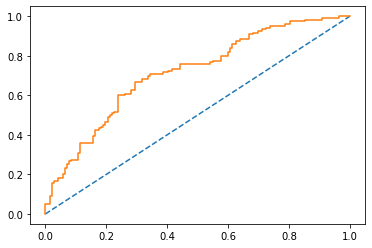

In [67]:
# predict probabilities
probs = LogRegmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC of the Logistic Regression for Test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [68]:
print('Confusion Matrix of the Logistic Regression for Train data:')
print(confusion_matrix(y_train,y_train_p))

Confusion Matrix of the Logistic Regression for Train data:
[[244  85]
 [118 163]]


Confusion Matrix of the Logistic Regression for Train data:


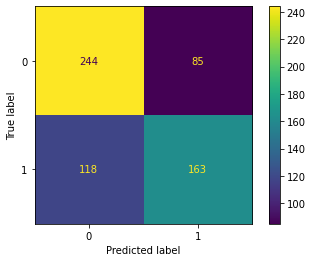

In [69]:
print('Confusion Matrix of the Logistic Regression for Train data:')
plot_confusion_matrix(LogRegmodel,X_train,y_train)

In [70]:
print('Confusion Matrix of the Logistic Regression for Test data:')
print(confusion_matrix(y_test,y_test_p))

Confusion Matrix of the Logistic Regression for Test data:
[[108  34]
 [ 58  62]]


Confusion Matrix of the Logistic Regression for Test data:


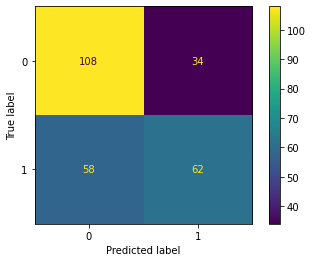

In [71]:
print('Confusion Matrix of the Logistic Regression for Test data:')
plot_confusion_matrix(LogRegmodel,X_test,y_test)

In [72]:
print('Classification Report of the Logistic Regression for Train data:')
print(classification_report(y_train,y_train_p))

Classification Report of the Logistic Regression for Train data:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [73]:
print('Classification Report of the Logistic Regression for Test data:')
print(classification_report(y_test,y_test_p))

Classification Report of the Logistic Regression for Test data:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



## Applying GridSearchCV for Logistic Regression

In [74]:
grid = {
    'penalty':['l2','none'],
    'solver' : ['saga','lbfgs','sag','liblinear'],
    'tol' : [0.0001,0.00001,0.001,0.000001]
}

LogRegmodel1 = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)
grid_search = GridSearchCV(LogRegmodel1,param_grid=grid,cv=5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'sag', 'liblinear'],
                         'tol': [0.0001, 1e-05, 0.001, 1e-06]},
             scoring='f1')

In [75]:
log_best_model = grid_search.best_estimator_
log_best_model

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='liblinear',
                   tol=1e-06)

In [76]:
y_test_p = log_best_model.predict(X_test)
y_train_p = log_best_model.predict(X_train)

Confusion Matrix of the Logistic Regression for Train data:


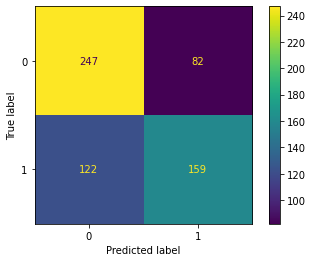

In [77]:
print('Confusion Matrix of the Logistic Regression for Train data:')
plot_confusion_matrix(log_best_model,X_train,y_train);

In [78]:
print('Classification Report of the Logistic Regression for Train data:')
print(classification_report(y_train,y_train_p))

Classification Report of the Logistic Regression for Train data:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610



Confusion Matrix of the Logistic Regression for Test data:


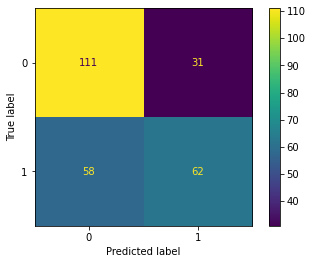

In [79]:
print('Confusion Matrix of the Logistic Regression for Test data:')
plot_confusion_matrix(log_best_model,X_test,y_test);

In [80]:
print('Classification Report of the Logistic Regression for Test data:')
print(classification_report(y_test,y_test_p))

Classification Report of the Logistic Regression for Test data:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       142
           1       0.67      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



AUC of the Logistic Regression for Train data: 0.732


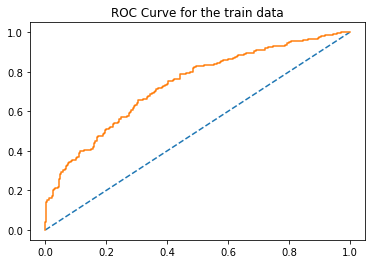

In [81]:
# predict probabilities
probs = log_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Logistic Regression for Train data: %.3f' % logr_train_auc)
# calculate roc curve
logr_train_fpr, logr_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_train_fpr, logr_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Logistic Regression for Test data: 0.716


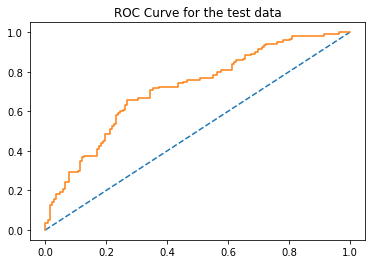

In [82]:
# predict probabilities
probs = log_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Logistic Regression for Test data: %.3f' % logr_test_auc)
# calculate roc curve
logr_test_fpr, logr_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_test_fpr, logr_test_tpr);
plt.title('ROC Curve for the test data');

In [83]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
logr_train_acc = round(accuracy_score(y_train,y_train_p),2)
logr_train_recall = round(recall_score(y_train,y_train_p,pos_label=1,average='binary'),2)
logr_train_precision = round(precision_score(y_train,y_train_p,pos_label=1,average='binary'),2)
logr_train_f1score = round(f1_score(y_train,y_train_p,pos_label=1,average='binary'),2)

In [84]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
logr_test_acc = round(accuracy_score(y_test,y_test_p),2)
logr_test_precision = round(precision_score(y_test,y_test_p,pos_label=1,average='binary'),2)
logr_test_recall = round(recall_score(y_test,y_test_p,pos_label=1,average='binary'),2)
logr_test_f1score = round(f1_score(y_test,y_test_p,pos_label=1,average='binary'),2)

## Linear Discriminant Analysis

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [87]:
y_test_p = LDAmodel.predict(X_test)
y_train_p = LDAmodel.predict(X_train)

In [88]:
print(confusion_matrix(y_train,y_train_p))

[[243  86]
 [120 161]]


Confusion Matrix of the LDA for Train data:


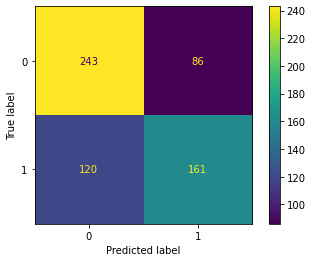

In [89]:
print('Confusion Matrix of the LDA for Train data:')
plot_confusion_matrix(LDAmodel,X_train,y_train);

In [90]:
print(confusion_matrix(y_test,y_test_p))

[[108  34]
 [ 58  62]]


Confusion Matrix of the LDA for Test data:


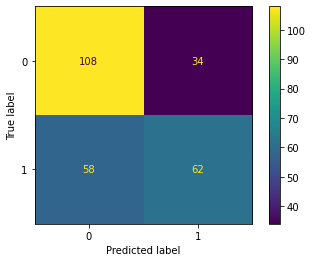

In [91]:
print('Confusion Matrix of the LDA for Test data:')
plot_confusion_matrix(LDAmodel,X_test,y_test);

In [92]:
print('Classification Report of the Linear Discriminant Analysis for Train data:')
print(classification_report(y_train,y_train_p))

Classification Report of the Linear Discriminant Analysis for Train data:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [93]:
print('Classification Report of the Linear Discriminant Analysis for Test data:')
print(classification_report(y_test,y_test_p))

Classification Report of the Linear Discriminant Analysis for Test data:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



AUC of the Linear Discriminant Analysis for Train data: 0.731


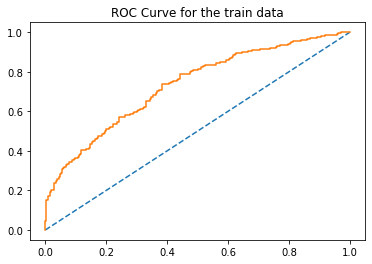

In [94]:
# predict probabilities
probs = LDAmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Linear Discriminant Analysis for Train data: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Linear Discriminant Analysis for Test data: 0.714


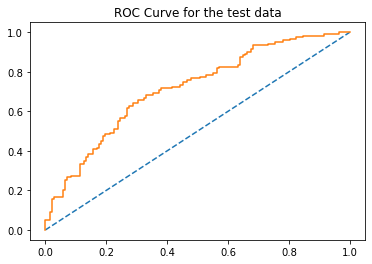

In [95]:

# predict probabilities
probs = LDAmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Linear Discriminant Analysis for Test data: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.title('ROC Curve for the test data');

In [96]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lda_train_acc = round(accuracy_score(y_train,y_train_p),2)
lda_train_recall = round(recall_score(y_train,y_train_p,pos_label=1,average='binary'),2)
lda_train_precision = round(precision_score(y_train,y_train_p,pos_label=1,average='binary'),2)
lda_train_f1score = round(f1_score(y_train,y_train_p,pos_label=1,average='binary'),2)

In [97]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lda_test_acc = round(accuracy_score(y_test,y_test_p),2)
lda_test_precision = round(precision_score(y_test,y_test_p,pos_label=1,average='binary'),2)
lda_test_recall = round(recall_score(y_test,y_test_p,pos_label=1,average='binary'),2)
lda_test_f1score = round(f1_score(y_test,y_test_p,pos_label=1,average='binary'),2)

### Comparing the Logistic Regression and Linear Discriminant Analysis Model

In [98]:
df = pd.DataFrame(data = [[logr_train_acc,logr_test_acc,lda_train_acc,lda_test_acc],
                             [logr_train_auc,logr_test_auc,lda_train_auc,lda_test_auc], 
                             [logr_train_recall,logr_test_recall,lda_train_recall,lda_test_recall],
                             [logr_train_precision,logr_test_precision,lda_train_precision,lda_test_precision],
                             [logr_train_f1score,logr_test_f1score,lda_train_f1score,lda_test_f1score]],
                   columns=['Logit Train', 'Logit Test', 'LDA Train', 'LDA Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

,Logit Train,Logit Test,LDA Train,LDA Test
Accuracy,0.67,0.66,0.66,0.65
AUC Score,0.73,0.72,0.73,0.71
Recall,0.57,0.52,0.57,0.52
Precision,0.66,0.67,0.65,0.65
F1 Score,0.61,0.58,0.61,0.57


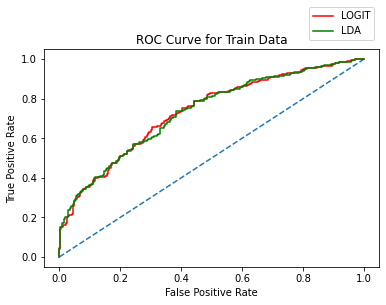

In [99]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_train_fpr, logr_train_tpr,color='red',label="LOGIT")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

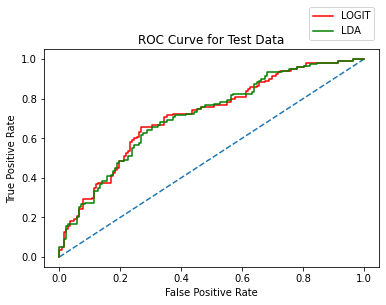

In [100]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_test_fpr, logr_test_tpr,color='red',label="LOGIT")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [101]:
coef = log_best_model.coef_[0].T
coef

array([-1.80261547e-05, -4.65050562e-02,  7.22841680e-02, -1.18162626e+00,
       -8.18456255e-03,  1.25602579e+00])

In [102]:
print (pd.DataFrame(coef, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                        Imp
foreign            1.256026
educ               0.072284
Salary            -0.000018
no_older_children -0.008185
age               -0.046505
no_young_children -1.181626


Text(0.5, 1.0, 'Importance of Features in Logistic Regression')

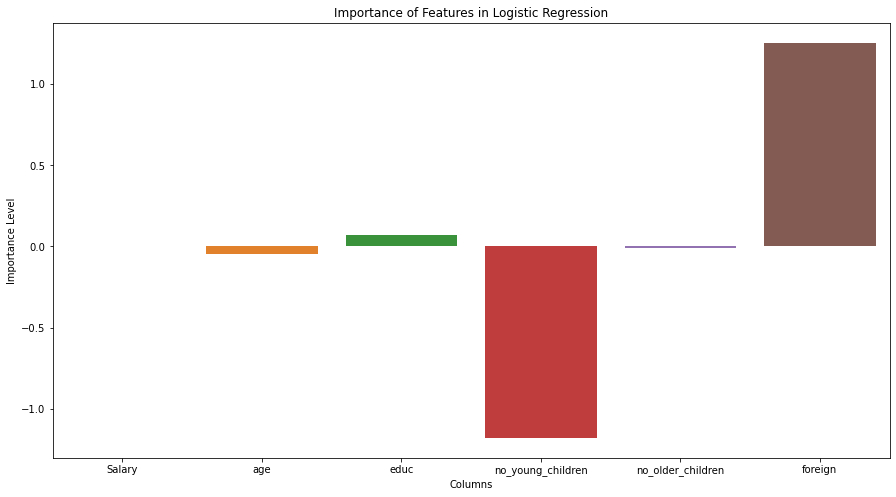

In [103]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Logistic Regression')

In [ ]:
sns.lineplot(x='foreign',y='Holliday_Package',data= hol)

In [ ]:
sns.lineplot(x='Salary',y='Holliday_Package',data= hol)

In [ ]:
sns.lineplot(x='no_young_children',y='Holliday_Package',data= hol)

In [104]:
coef1 = LDAmodel.coef_[0].T
coef1

array([-1.96033150e-05, -5.88292823e-02,  5.77484885e-02, -1.30068735e+00,
       -4.61122661e-02,  1.29547644e+00])

In [105]:
print (pd.DataFrame(coef1, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                        Imp
foreign            1.295476
educ               0.057748
Salary            -0.000020
no_older_children -0.046112
age               -0.058829
no_young_children -1.300687


Text(0.5, 1.0, 'Importance of Features in LDA')

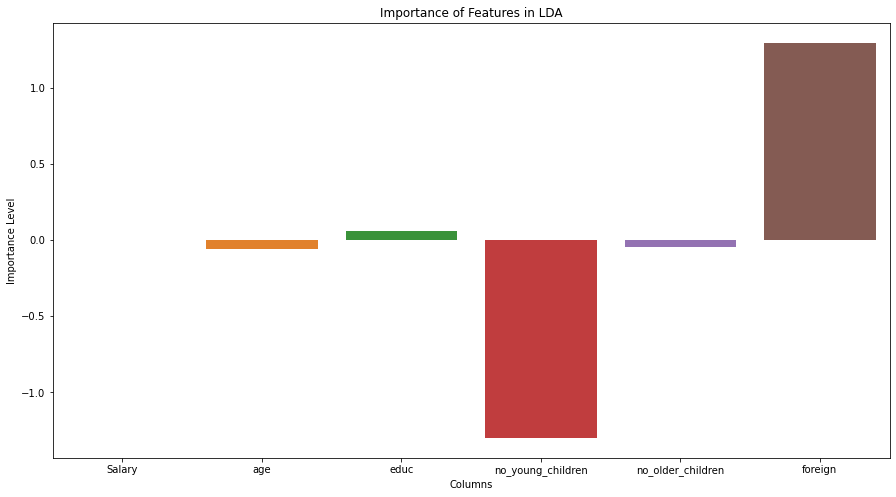

In [106]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef1)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in LDA')

In [ ]:
true_neg = np.logical_and(y_train != y_train_p, y_train == 1)
X_train[true_neg].head()

In [ ]:
hol.iloc[773]

In [ ]:
hol.iloc[821]

In [ ]:
true_pos = np.logical_and(y_train != y_train_p, y_train == 0)
X_train[true_pos].head()

In [ ]:
X_train.describe()

In [ ]:
X_train[true_neg].describe()

In [ ]:
true_neg1 = np.logical_and(y_test != y_test_p, y_test == 1)
X_test[true_neg1].head()

In [ ]:
true_pos1 = np.logical_and(y_test != y_test_p, y_test == 0)
X_test[true_pos1].head()

In [ ]:
X_test.describe()

In [ ]:
X_test[true_neg1].describe()

In [ ]:
pred_x_train = X_train[true_neg].append(X_train[true_pos])
pred_x_train

In [ ]:
pred_x_train.columns

In [ ]:
Predicted_Hol = pd.pivot_table(hol,index=['Holliday_Package','foreign'])
Predicted_Hol